# Apophis Ephemeris Download


Agustín Vallejo Villegas

This notebook will look up the data for the Apophis trajectory in JPL's Horizons web service using the Astroquery library.

An extra column is added at the end: `delta (Rt)` which will have the distance from Earth's center to Apophis in Earth Radii.

Finally, the dataframe is saved to the Data folder as `ephemeris.xlsx`


### Documentación
+ Horizons Query: 
    + https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html


### Librerías

In [1]:
"LIBRERÍAS BÁSICAS"
import numpy as np
import pandas as pd

In [2]:
"ASTROPY"
!pip install astroquery
from astroquery.jplhorizons import Horizons

from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import astropy.units as u

     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 802 kB 67.6 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.5 MB 43.5 MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=c258e49fa04ff13e4f0c61c1d409453a6af5659b7d4a71416392348040aee908
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built mimeparse


In [3]:
"TQDM"
!pip install tqdm
from tqdm import tqdm

## Google Drive

In [4]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [5]:
!ls "/gdrive/MyDrive/Apophis/Data"

'1. Apophis over Earth.png'   observatory_distances.csv
'2. Apophis over USA.png'     observatory_distances_indexes.csv
'3. Apophis over Asia.png'   "Radio coverage Earth's Center.png"
 AllRadiotelescopes.xlsx     'Radio coverage FAST.png'
 ephemeris2.xlsx	     'Radio coverage Goldstone Radio Telescope.png'
 ephemeris3.xlsx	      subradar_points.csv
 ephemeris.xlsx		      utils.ipynb


## Efemérides

In [6]:
"UNIDAD ASTRONÓMICA"
AU = (1*u.au).to(u.m).value

"TIEMPOS"
# Se definen los tiempos desde que está a 12Rt, pasando por su máximo
# acercamiento en 6Rt y volviendo a 12Rt
t_ini = Time('2029-04-13 13:30:00',format='iso')
t_max = Time('2029-04-13 22:05:00',format='iso') #Máximo Acercamiento
# t_end = Time('2029-04-13 23:00:00',format='iso') #Final. Step de 5min
t_end = Time('2029-04-14 06:05:00',format='iso')

epochs = {'start':t_ini.value, 'stop':t_end.value, 'step':'5m'}


print("(Ignorar advertencia de ERFA si sale, es porque está muy a futuro)")

(Ignorar advertencia de ERFA si sale, es porque está muy a futuro)


/usr/local/lib/python3.7/dist-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  ErfaWarning)
/usr/local/lib/python3.7/dist-packages/erfa/core.py:155: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  ErfaWarning)


In [7]:
"EFEMÉRIDES"
#Efemérides de Apofis entre los tiempos estipulados
apophis = Horizons(id='99942',epochs=epochs) 
ephemeris = apophis.ephemerides()
vectors = apophis.vectors()

#Coordenadas Ecuatoriales del Asteroide
ECUcoords = SkyCoord(ephemeris['RA'], ephemeris['DEC']
                     ,ephemeris['delta'], frame='gcrs')

Nt = np.shape(ephemeris)[0]
print(Nt)

200


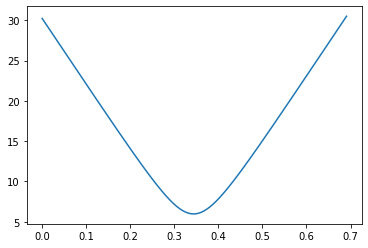

In [8]:
# ephemeris = ephemeris.to_pandas()
import pylab as plt
plt.plot(ephemeris['datetime_jd']-ephemeris['datetime_jd'][0],ephemeris['delta']*23500)

In [9]:
ephemeris['delta']*23500

30.223624762705
29.94040038897
29.657183843085
29.37397684807
29.090781222354998
28.80759888777
28.524431873305
28.241282322865004
27.95815250138
27.675044801855
27.39196175383


In [10]:
u.au.to(u.R_earth)

23454.927125633025

In [11]:
ephemeris['delta (Rt)'] = ephemeris['delta']*u.au.to(u.R_earth)
ephemeris

targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat,delta (Rt)
---,---,d,mag,---,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg,
str24,str17,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,str1,float64,int64,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
99942 Apophis (2004 MN4),2029-Apr-13 13:30,2462240.0625,19.7,0.25,,,200.17701,-23.94602,200.58737,-24.10272,-4791.56,3011.925,--,--,--,--,634038.343,-120161.53,174.508,--,999,--,5.983,3.511,98.32338,0.0061,594358.6,*,0.364502,--,--,--,--,185.94,0.05,--,--,203.5044,-0.0165,1.00406873348,-5.1501566,0.00128611169203,-6.0098982,0.01069626,28.3680165,6.1863549,165.0996,/T,14.8811,167.8,0.2874,0.0212,6.046,290.82,14.51239,Hya,69.185627,208.1337987,-14.3014819,--,--,311.484881,38.436693,--,0.0,3.82,2.092,3.95,1.835,-16.685,22.77,4.355,0.7499,1.3e-06,0.42,1.54,5e-06,233.7582,--,14.8796,205.574,-7.163,30.165656011988236
99942 Apophis (2004 MN4),2029-Apr-13 13:35,2462240.065972222,19.7,0.25,,,200.05465,-23.87547,200.46477,-24.03229,-4879.96,3073.449,--,--,--,--,633589.121,-119912.5,174.033,--,999,--,5.96,3.509,98.33648,0.0061,594570.6,*,0.36795,--,--,--,--,186.45,0.05,--,--,203.5076,-0.0163,1.004058401906,-5.1535231,0.00127405959102,-6.0097484,0.01059603,28.3687347,6.1895141,165.1585,/T,14.8225,167.9,0.2852,0.0209,6.556,290.867,14.48224,Hya,69.185627,207.9992272,-14.279487,--,--,311.356425,38.522587,--,0.0,3.855,2.113,3.987,1.852,-16.742,23.2,4.396,0.7464,1.4e-06,0.43,1.57,5e-06,233.7754,--,14.821,205.5095,-7.1515,29.882974861087916
99942 Apophis (2004 MN4),2029-Apr-13 13:40,2462240.069444444,19.7,0.25,,,199.93009,-23.80346,200.33998,-23.96041,-4970.83,3136.847,--,--,--,--,633132.074,-119658.26,173.545,--,999,--,5.938,3.507,98.34955,0.0061,594782.8,*,0.371464,--,--,--,--,186.97,0.05,--,--,203.5107,-0.0161,1.00404806352,-5.1569506,0.00126200782311,-6.0095629,0.0104958,28.3694688,6.192732,165.2175,/T,14.7638,168.0,0.283,0.0206,7.079,290.915,14.45143,Hya,69.185627,207.8621123,-14.256994,--,--,311.225201,38.609977,--,0.0,3.891,2.134,4.025,1.869,-16.799,23.63,4.438,0.743,1.4e-06,0.44,1.6,5e-06,233.793,--,14.7623,205.4437,-7.1399,29.600301523023823
99942 Apophis (2004 MN4),2029-Apr-13 13:45,2462240.072916667,19.7,0.25,,,199.80327,-23.72997,200.21292,-23.88705,-5064.27,3202.193,--,--,--,--,632666.989,-119398.66,173.045,--,999,--,5.915,3.505,98.36258,0.0061,594995.3,*,0.375045,--,--,--,--,187.51,0.05,--,--,203.5139,-0.0159,1.004037718198,-5.160441,0.00124995646162,

In [12]:
ephemeris = ephemeris.to_pandas()

In [14]:
ephemeris.to_excel("/gdrive/MyDrive/Apophis/Data/ephemeris.xlsx")
vectors.to_pandas().to_excel("/gdrive/MyDrive/Apophis/Data/vectors.xlsx")